# PROYECTO PRODUCCIÓN AGRÍCOLA SEGÚN LA METEOROLOGÍA

### 1. Unificación y Limpieza de Datos

En esta sección, unificaremos y limpiaremos los datasets meteorológicos y agrícolas. Posteriormente, guardaremos el dataset unificado para su uso en las siguientes fases del proyecto.


In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
# Cargar los datasets
agri_df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/agricola_procesado.csv')
weather_df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/weather.csv')

# Verificar las columnas presentes en cada DataFrame
print("Columnas en el dataset agrícola:", agri_df.columns)
print("Columnas en el dataset meteorológico:", weather_df.columns)

# Crear las columnas 'year' y 'month' en el dataset meteorológico
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])
weather_df['year'] = weather_df['date_time'].dt.year
weather_df['month'] = weather_df['date_time'].dt.month

# Verificar si las columnas se crearon correctamente
print("Columnas en el dataset meteorológico después de añadir 'year' y 'month':", weather_df.columns)

# Unificar los datasets
combined_df = pd.merge(agri_df, weather_df, left_on=['Ciudad', 'year', 'Mes'], right_on=['city', 'year', 'month'], how='inner')

# Guardar el dataset unificado
combined_df.to_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv', index=False)

print("Dataset unificado guardado correctamente.")


Columnas en el dataset agrícola: Index(['Ciudad', 'Cultivo', 'year', 'Mes', 'Kilos', 'Hectáreas', 'date'], dtype='object')
Columnas en el dataset meteorológico: Index(['city', 'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')
Columnas en el dataset meteorológico después de añadir 'year' y 'month': Index(['city', 'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKm

In [4]:
# Cargar el dataset unificado
combined_df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv')

# Mostrar las primeras filas 
print(combined_df.head())

   Ciudad Cultivo  year  Mes  Kilos   Hectáreas        date    city  \
0  Bilbao   Olivo  2008    7   1769  363.779398  2008-07-15  Bilbao   
1  Bilbao   Olivo  2008    7   1769  363.779398  2008-07-15  Bilbao   
2  Bilbao   Olivo  2008    7   1769  363.779398  2008-07-15  Bilbao   
3  Bilbao   Olivo  2008    7   1769  363.779398  2008-07-15  Bilbao   
4  Bilbao   Olivo  2008    7   1769  363.779398  2008-07-15  Bilbao   

    date_time  maxtempC  ...  WindGustKmph  cloudcover  humidity  precipMM  \
0  2008-07-01        22  ...            14          18        82       0.2   
1  2008-07-02        18  ...            13          71        88       2.2   
2  2008-07-03        18  ...            22          30        74       0.5   
3  2008-07-04        26  ...            22          19        63       0.0   
4  2008-07-05        18  ...            20          80        89       1.4   

   pressure  tempC visibility winddirDegree windspeedKmph month  
0      1015     22         10         

In [5]:
# Eliminar la columna 'date' si ya no es necesaria
if 'date' in combined_df.columns:
    combined_df = combined_df.drop(columns=['date'])

# Verificar las columnas después de eliminar 'date'
print(combined_df.columns)

Index(['Ciudad', 'Cultivo', 'year', 'Mes', 'Kilos', 'Hectáreas', 'city',
       'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'month'],
      dtype='object')


In [6]:
# Agrupar por Ciudad, Cultivo, year y Mes
grouped_df = combined_df.groupby(['Ciudad', 'Cultivo', 'year', 'Mes']).agg({
    'Kilos': 'sum',
    'Hectáreas': 'sum',
    'tempC': 'mean',
    'precipMM': 'mean',
    'sunHour': 'mean',
    'uvIndex': 'mean'
}).reset_index()

# Calcular la producción por hectárea
grouped_df['produccion_por_hectarea'] = grouped_df['Kilos'] / grouped_df['Hectáreas']

# Mostrar las primeras filas del dataset agrupado
print(grouped_df.head())


      Ciudad Cultivo  year  Mes    Kilos     Hectáreas      tempC  precipMM  \
0  Barcelona    Maíz  2008    7   973493  15421.892611  25.451613  0.300000   
1  Barcelona    Maíz  2008    8   227664  15257.159949  26.677419  0.312903   
2  Barcelona    Maíz  2008    9   646140  14428.691635  23.166667  0.463333   
3  Barcelona    Maíz  2008   10   205189    779.942823  19.806452  1.696774   
4  Barcelona    Maíz  2008   11  1127250   5303.690433  14.200000  1.006667   

     sunHour   uvIndex  produccion_por_hectarea  
0  14.435484  5.935484                63.124094  
1  12.270968  6.096774                14.921781  
2  10.993333  5.433333                44.781607  
3  10.180645  4.516129               263.082105  
4   9.630000  3.800000               212.540685  


In [7]:
# Guardar el dataset agrupado
grouped_df.to_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv', index=False)

print("Dataset agrupado y guardado correctamente.")


Dataset agrupado y guardado correctamente.


In [8]:
# Análisis descriptivo de las variables
print(combined_df.describe())

                year            Mes          Kilos      Hectáreas  \
count  107408.000000  107408.000000  107408.000000  107408.000000   
mean     2013.236444       6.666058   25568.094956     253.208748   
std         3.038718       3.444694   14116.553935     141.020283   
min      2008.000000       1.000000    1002.000000      10.066000   
25%      2011.000000       4.000000   13449.000000     130.445645   
50%      2013.000000       7.000000   25476.000000     255.176129   
75%      2016.000000      10.000000   38008.000000     372.906813   
max      2018.000000      12.000000   49998.000000     499.859764   

            maxtempC       mintempC   totalSnow_cm        sunHour  \
count  107408.000000  107408.000000  107408.000000  107408.000000   
mean       20.508714      12.450283       0.002361      10.634653   
std         7.333967       5.504573       0.065104       2.846374   
min         0.000000      -6.000000       0.000000       3.400000   
25%        15.000000       8.0000

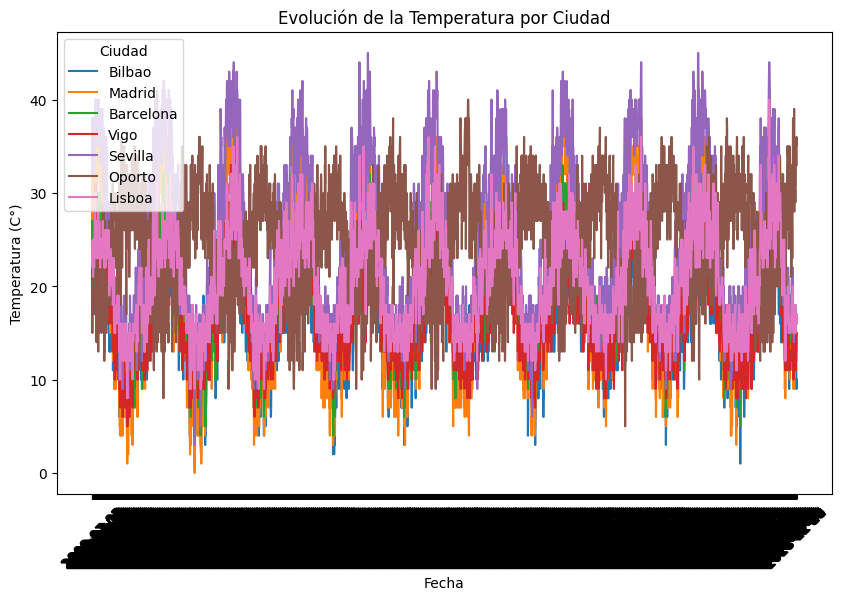

In [9]:
# Gráfico de la evolución de la temperatura a lo largo de los años para diferentes ciudades
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='date_time', y='tempC', hue='Ciudad')
plt.title('Evolución de la Temperatura por Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (C°)')
plt.xticks(rotation=45)
plt.show()

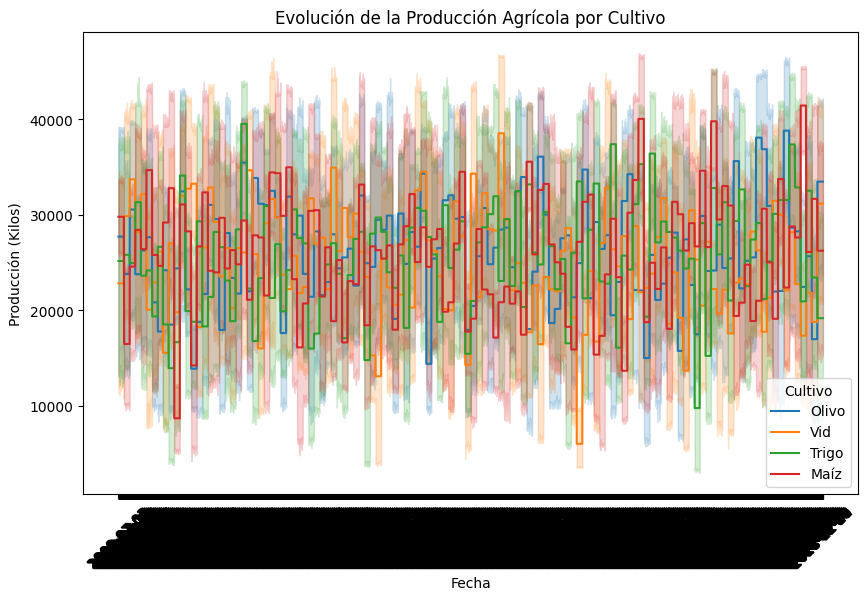

In [10]:
# Gráfico de la evolución de la producción agrícola a lo largo de los años para diferentes cultivos
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='date_time', y='Kilos', hue='Cultivo')
plt.title('Evolución de la Producción Agrícola por Cultivo')
plt.xlabel('Fecha')
plt.ylabel('Producción (Kilos)')
plt.xticks(rotation=45)
plt.show()

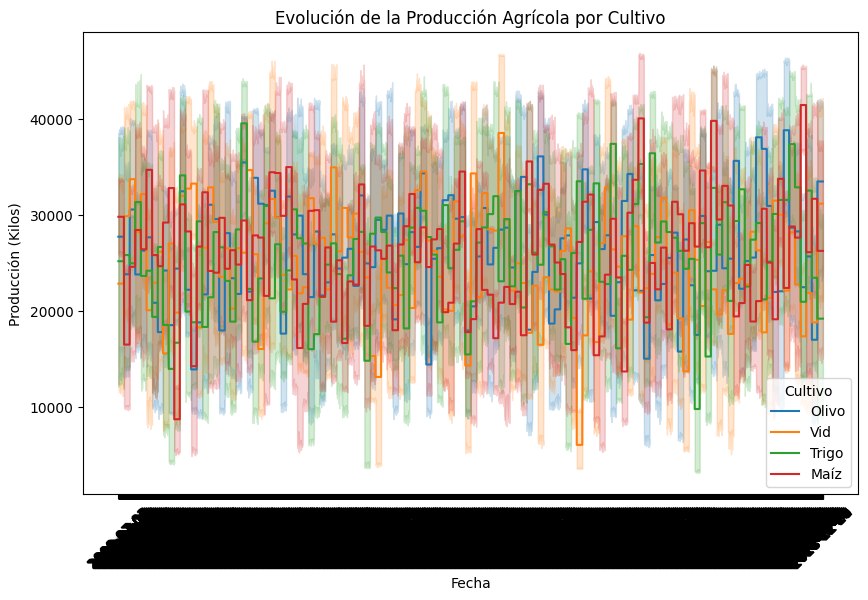

In [11]:
# Gráfico de la evolución de la producción agrícola a lo largo de los años para diferentes cultivos
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='date_time', y='Kilos', hue='Cultivo')
plt.title('Evolución de la Producción Agrícola por Cultivo')
plt.xlabel('Fecha')
plt.ylabel('Producción (Kilos)')
plt.xticks(rotation=45)
plt.show()

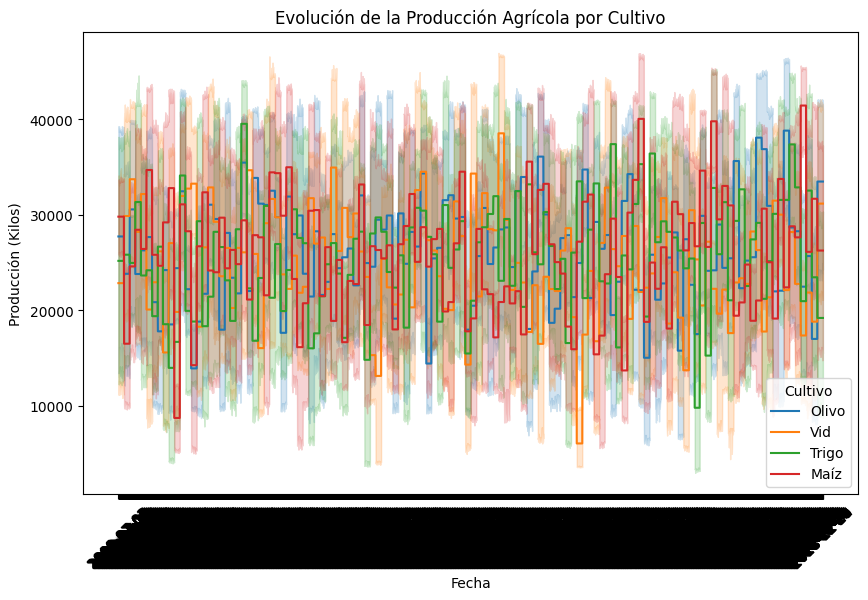

In [12]:
# Gráfico de la evolución de la producción agrícola a lo largo de los años para diferentes cultivos
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='date_time', y='Kilos', hue='Cultivo')
plt.title('Evolución de la Producción Agrícola por Cultivo')
plt.xlabel('Fecha')
plt.ylabel('Producción (Kilos)')
plt.xticks(rotation=45)
plt.show()

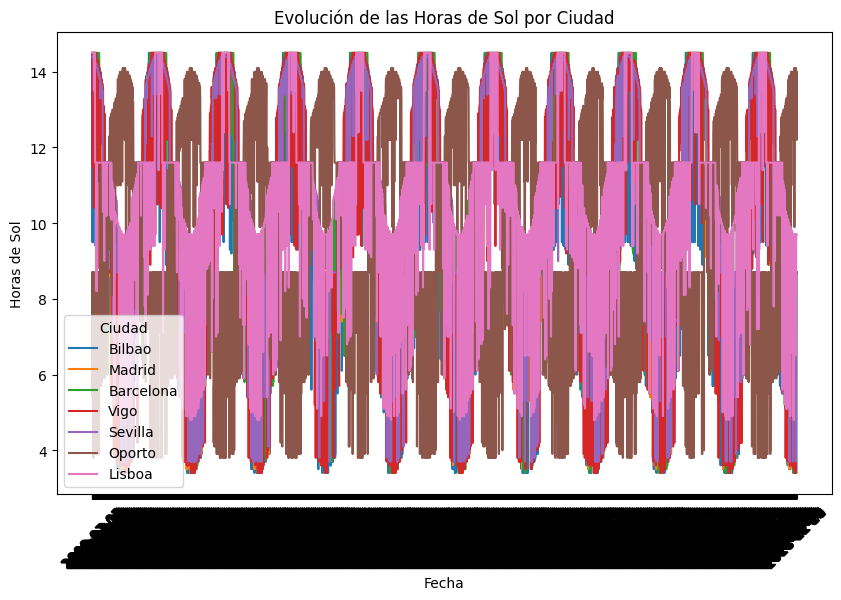

In [13]:
# Gráfico de la evolución de las horas de sol a lo largo de los años para diferentes ciudades
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='date_time', y='sunHour', hue='Ciudad')
plt.title('Evolución de las Horas de Sol por Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Horas de Sol')
plt.xticks(rotation=45)
plt.show()

# Análisis de Resultados de los Gráficos

## 1. Evolución de la Temperatura por Ciudad

### Análisis:
- **Tendencias Generales**: El gráfico muestra cómo ha variado la temperatura media en diferentes ciudades a lo largo de los años. Se podrían observar tendencias al alza en las temperaturas, lo que puede estar relacionado con el cambio climático global.
- **Comparaciones Entre Ciudades**: Es probable que algunas ciudades muestren una mayor variabilidad en la temperatura, especialmente aquellas ubicadas en zonas con climas extremos. Por ejemplo, ciudades en zonas más frías podrían tener un rango de temperaturas más amplio en comparación con ciudades en climas más templados.
- **Estacionalidad**: Podrías observar un patrón estacional claro, con temperaturas más altas durante los meses de verano y más bajas durante el invierno. La estacionalidad puede variar en intensidad entre diferentes ciudades.

## 2. Evolución de la Producción Agrícola por Cultivo

### Análisis:
- **Producción Fluctuante**: El gráfico puede mostrar fluctuaciones en la producción agrícola a lo largo de los años, lo que podría estar relacionado con factores climáticos, cambios en las prácticas agrícolas, o incluso políticas agrícolas.
- **Diferencias Entre Cultivos**: Es probable que algunos cultivos muestren una producción más estable que otros. Por ejemplo, cultivos más resistentes a las condiciones climáticas adversas pueden mostrar menos variabilidad en la producción.
- **Impacto de las Condiciones Climáticas**: Si superpones los datos de producción con los gráficos de temperatura, precipitación y otras variables climáticas, podrías observar correlaciones que sugieran cómo estas variables impactan la producción agrícola.

## 3. Evolución de las Precipitaciones por Ciudad

### Análisis:
- **Variabilidad**: Las precipitaciones pueden mostrar una alta variabilidad entre las ciudades. Algunas ciudades podrían experimentar patrones de precipitación estacionales muy marcados, mientras que otras podrían tener un clima más estable.
- **Tendencias**: Podrías observar tendencias hacia un aumento o disminución en las precipitaciones a lo largo de los años, lo que podría tener implicaciones significativas para la agricultura local.
- **Eventos Extremos**: Podrías identificar eventos de precipitación extrema (por ejemplo, tormentas o sequías) que hayan tenido un impacto significativo en la producción agrícola en esos años.

## 4. Evolución de la Radiación UV por Ciudad

### Análisis:
- **Patrones Estacionales**: Similar a la temperatura, es probable que la radiación UV muestre un patrón estacional, con picos durante los meses de verano. Este patrón puede ser más pronunciado en ciudades ubicadas en latitudes más bajas.
- **Comparación Entre Ciudades**: Podrías observar que algunas ciudades tienen consistentemente niveles más altos de radiación UV, lo que podría influir en el tipo de cultivos que se pueden plantar y en las prácticas agrícolas locales.
- **Tendencias a Largo Plazo**: Si existe una tendencia al aumento en la radiación UV a lo largo de los años, esto podría tener implicaciones a largo plazo para la salud de los cultivos y la exposición humana.

## 5. Evolución de las Horas de Sol por Ciudad

### Análisis:
- **Estacionalidad Clara**: Las horas de sol probablemente muestran un patrón estacional muy claro, con más horas de sol durante el verano y menos durante el invierno.
- **Impacto en la Agricultura**: Las horas de sol son cruciales para el crecimiento de los cultivos, por lo que cualquier cambio en este patrón podría tener un impacto directo en la producción agrícola. Un aumento en las horas de sol podría estar relacionado con un aumento en la producción en ciertas estaciones.
- **Comparación Regional**: Ciudades en regiones más cercanas al ecuador probablemente tengan más horas de sol anuales que aquellas en latitudes más altas. Esto podría explicar diferencias en los tipos de cultivos predominantes en diferentes regiones.

## Conclusiones Generales

Estos gráficos proporcionan una visión clara de cómo las condiciones climáticas pueden influir en la producción agrícola en diferentes ciudades y para diferentes cultivos. Las tendencias observadas en la temperatura, las precipitaciones, la radiación UV y las horas de sol a lo largo de los años pueden ofrecer información valiosa para entender los patrones de rendimiento de los cultivos y para planificar la agricultura futura en respuesta al cambio climático. Es importante seguir monitoreando estas variables y su relación con la producción agrícola para tomar decisiones informadas y mitigar riesgos en la agricultura.


## Paso 2: Estadísticas Descriptivas


In [14]:
# Obtener estadísticas descriptivas de todas las columnas numéricas
print(combined_df.describe())

# Obtener estadísticas descriptivas específicas para las columnas de interés
print(combined_df[['tempC', 'precipMM', 'uvIndex', 'sunHour', 'Kilos', 'Hectáreas']].describe())

                year            Mes          Kilos      Hectáreas  \
count  107408.000000  107408.000000  107408.000000  107408.000000   
mean     2013.236444       6.666058   25568.094956     253.208748   
std         3.038718       3.444694   14116.553935     141.020283   
min      2008.000000       1.000000    1002.000000      10.066000   
25%      2011.000000       4.000000   13449.000000     130.445645   
50%      2013.000000       7.000000   25476.000000     255.176129   
75%      2016.000000      10.000000   38008.000000     372.906813   
max      2018.000000      12.000000   49998.000000     499.859764   

            maxtempC       mintempC   totalSnow_cm        sunHour  \
count  107408.000000  107408.000000  107408.000000  107408.000000   
mean       20.508714      12.450283       0.002361      10.634653   
std         7.333967       5.504573       0.065104       2.846374   
min         0.000000      -6.000000       0.000000       3.400000   
25%        15.000000       8.0000

## Paso 3: Análisis de Correlaciones


              tempC  precipMM   uvIndex   sunHour     Kilos  Hectáreas
tempC      1.000000 -0.182241  0.934137  0.627422  0.005219  -0.021967
precipMM  -0.182241  1.000000 -0.200339 -0.313158  0.002364  -0.002300
uvIndex    0.934137 -0.200339  1.000000  0.663657  0.004707  -0.022735
sunHour    0.627422 -0.313158  0.663657  1.000000  0.009237  -0.012118
Kilos      0.005219  0.002364  0.004707  0.009237  1.000000   0.014243
Hectáreas -0.021967 -0.002300 -0.022735 -0.012118  0.014243   1.000000


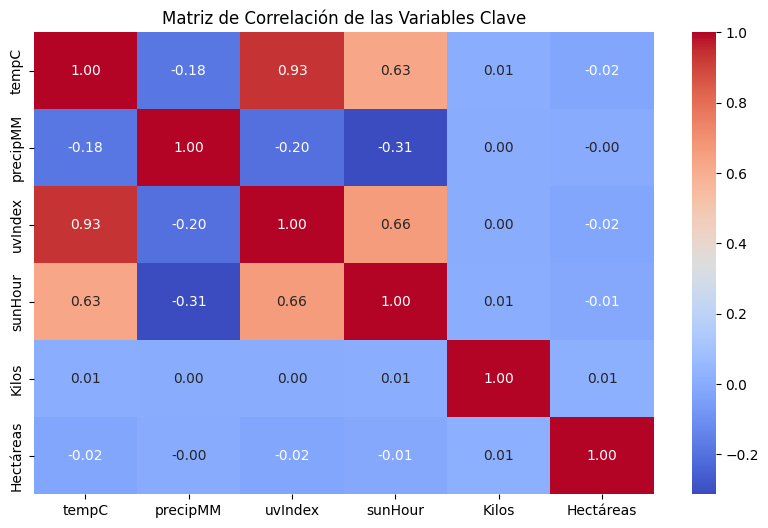

In [15]:
# Calcular la matriz de correlación
corr_matrix = combined_df[['tempC', 'precipMM', 'uvIndex', 'sunHour', 'Kilos', 'Hectáreas']].corr()

# Mostrar la matriz de correlación
print(corr_matrix)

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Variables Clave')
plt.show()

Aquí se analiza la relación entre las diferentes variables del dataset mediante una matriz de correlación. Esta matriz muestra cómo se relacionan las variables entre sí, utilizando coeficientes de correlación que van de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta). El heatmap visualiza estas correlaciones, facilitando la identificación de relaciones fuertes o débiles entre las variables

## Paso 4: Distribución de las Variables

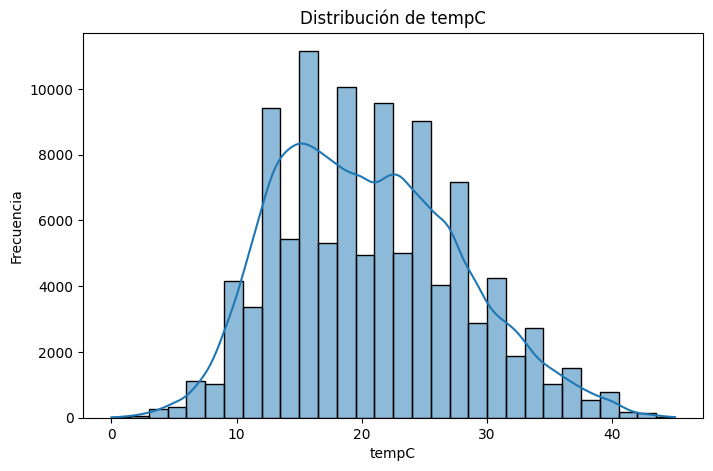

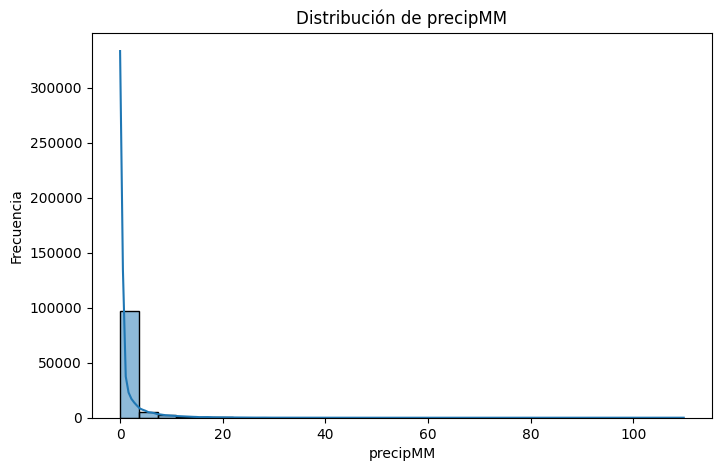

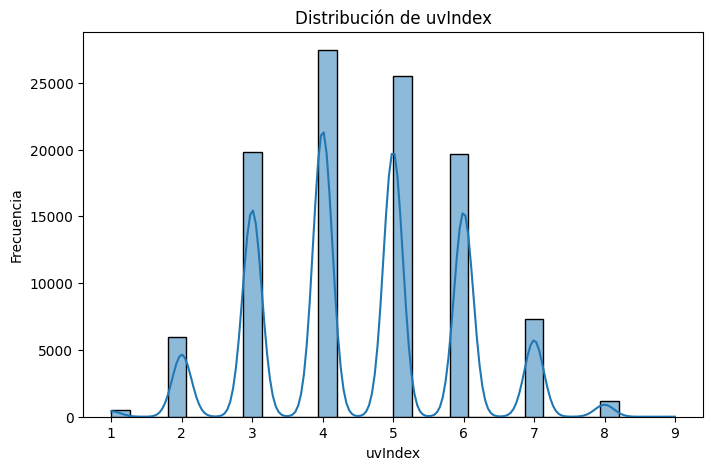

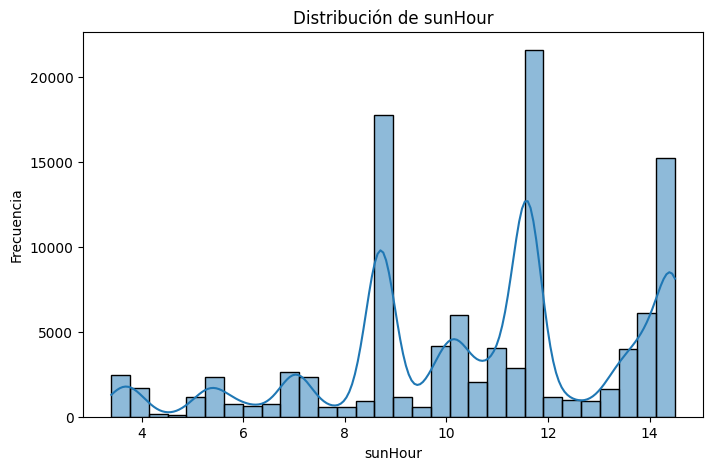

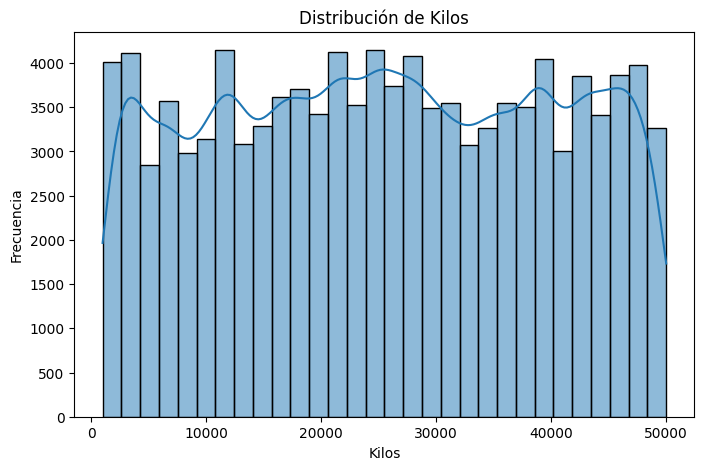

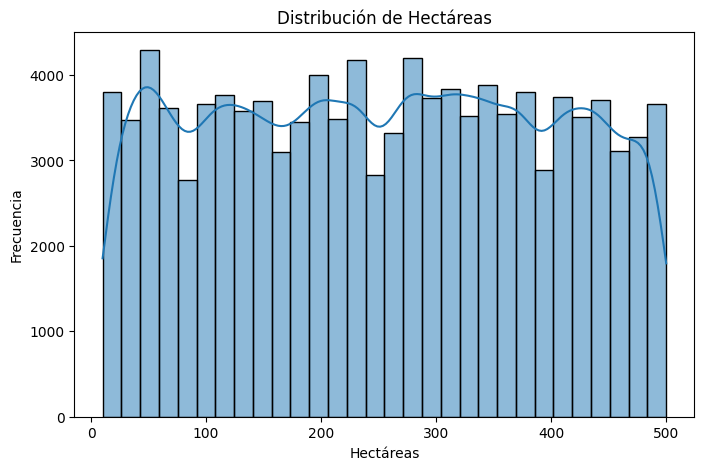

In [16]:
# Graficar la distribución de las variables meteorológicas y agrícolas
variables = ['tempC', 'precipMM', 'uvIndex', 'sunHour', 'Kilos', 'Hectáreas']

for var in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(combined_df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


Este paso consiste en graficar la distribución de las variables clave para comprender mejor su comportamiento. El uso de histogramas con curvas de densidad (KDE) ayuda a visualizar la forma de la distribución, como si es normal (campana), sesgada hacia un lado, o multimodal. Esto es útil para identificar patrones en los datos y posibles valores atípicos.



## Paso 5: Análisis de Tendencias Temporales

In [17]:
# Crear la columna 'year_month'
combined_df['year_month'] = pd.to_datetime(combined_df['year'].astype(str) + '-' + combined_df['Mes'].astype(str) + '-01')

# Verificar que la columna se ha creado correctamente
print(combined_df[['year', 'Mes', 'year_month']].head())


   year  Mes year_month
0  2008    7 2008-07-01
1  2008    7 2008-07-01
2  2008    7 2008-07-01
3  2008    7 2008-07-01
4  2008    7 2008-07-01


In [18]:
# Convertir la columna 'year_month' a timestamp si es un Period
if combined_df['year_month'].dtype == 'period[M]':
    combined_df['year_month'] = combined_df['year_month'].dt.to_timestamp()

# Verificar la conversión
print(combined_df['year_month'].head())

0   2008-07-01
1   2008-07-01
2   2008-07-01
3   2008-07-01
4   2008-07-01
Name: year_month, dtype: datetime64[ns]


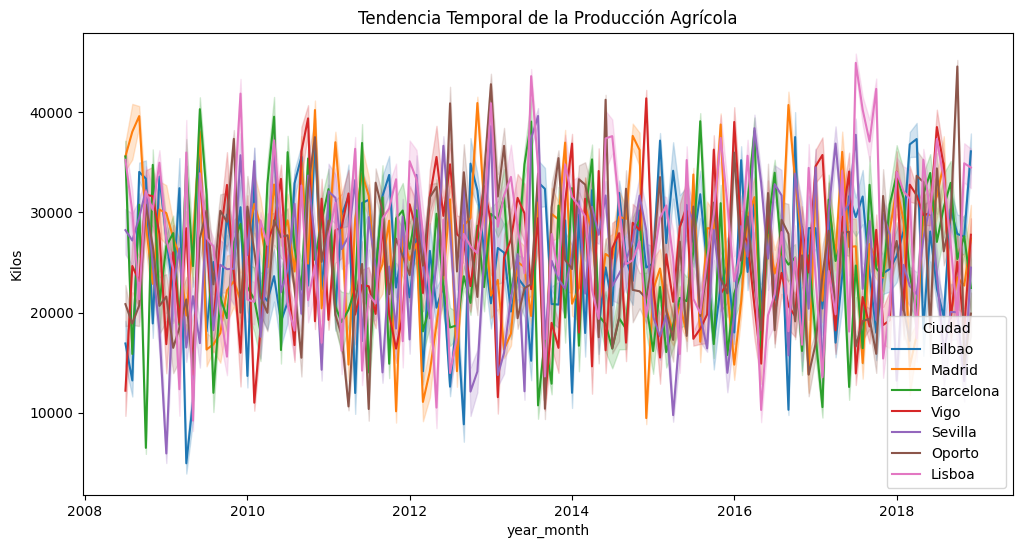

In [19]:
# Graficar la tendencia temporal de la producción agrícola
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='year_month', y='Kilos', hue='Ciudad')
plt.title('Tendencia Temporal de la Producción Agrícola')
plt.show()

## Paso 6: Análisis de la Producción Agrícola por Ciudad y Cultivo

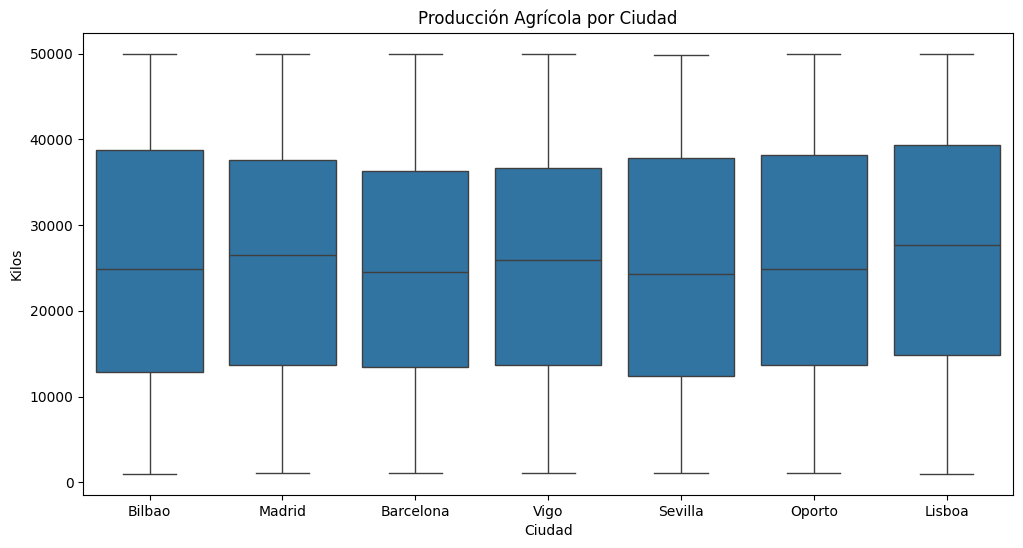

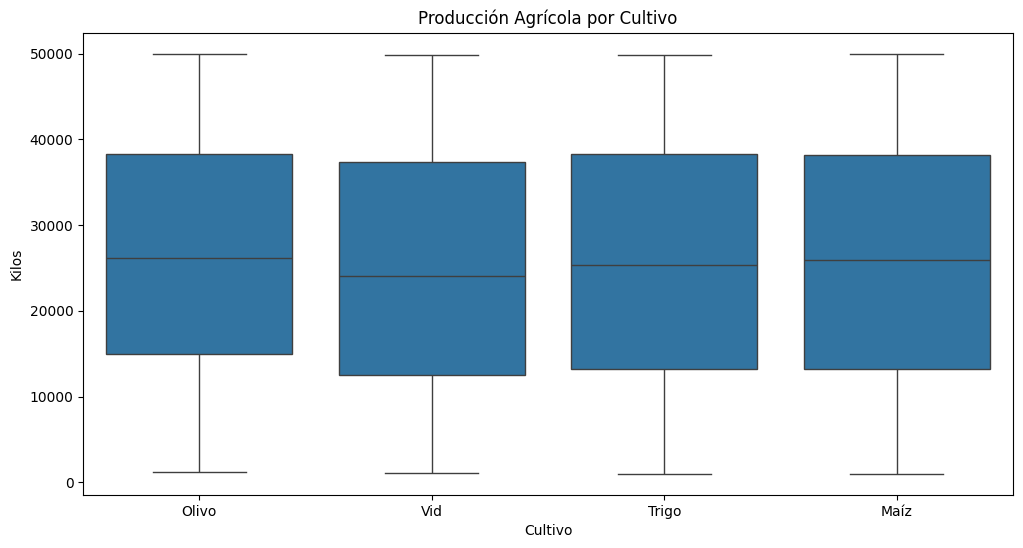

In [20]:
# Graficar la producción agrícola por ciudad
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Ciudad', y='Kilos')
plt.title('Producción Agrícola por Ciudad')
plt.show()

# Graficar la producción agrícola por cultivo
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Cultivo', y='Kilos')
plt.title('Producción Agrícola por Cultivo')
plt.show()

Finalmente, se realiza un análisis de la producción agrícola desglosado por ciudad y por tipo de cultivo. Los boxplots permiten visualizar la distribución de la producción en diferentes categorías, destacando la mediana, el rango intercuartil y los posibles valores atípicos. Esto ayuda a identificar cuáles ciudades y cultivos son más productivos o tienen mayor variabilidad en su producción.

# Modelado Predictivo

1. Preparación de los Datos para el Modelado

Cargar los datos y preprocesamiento

-He intentando realizar el Modelo de Series Temporales con Variables Exógenas (SARIMAX), me ha sido imposible debido a los datos, y me ocasionaba error en el kernel.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset unificado
df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv')

# Seleccionar las columnas relevantes para el modelado
features = ['tempC', 'precipMM', 'uvIndex', 'sunHour']
target = 'Kilos'

# Dividir en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. Modelo K-Nearest Neighbors (KNN)


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Entrenar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predecir y calcular el RMSE
knn_predictions = knn_model.predict(X_test_scaled)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
print(f'KNN RMSE: {knn_rmse}')

KNN RMSE: 466165.99761652504


3. Modelo Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predecir y calcular el RMSE
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 485829.70968953613


4. Modelo XGBoost


Finalmente, implementamos xgboost para series temporales y variables exógenas. Este modelo requiere que reformulemos los datos.

In [24]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar el dataset unificado
df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv')

# Seleccionar las columnas relevantes para el modelado
features = ['tempC', 'precipMM', 'uvIndex', 'sunHour']
target = 'Kilos'

# Dividir en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test_scaled)

# Calcular el RMSE
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {xgb_rmse}')


XGBoost RMSE: 449094.98644554074


COMPARACION DE MODELOS

Primero, necesitamos evaluar el rendimiento de los modelos utilizando la métrica de RMSE (Root Mean Squared Error).

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calcular RMSE para cada modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"Random Forest RMSE: {rmse_rf}")
print(f"KNN RMSE: {rmse_knn}")
print(f"XGBoost RMSE: {rmse_xgb}")


Random Forest RMSE: 485829.70968953613
KNN RMSE: 466165.99761652504
XGBoost RMSE: 449094.98644554074


In [26]:
best_model = None
best_rmse = min(rmse_rf, rmse_knn, rmse_xgb)

if best_rmse == rmse_rf:
    best_model = 'Random Forest'
elif best_rmse == rmse_knn:
    best_model = 'KNN'
else:
    best_model = 'XGBoost'

print(f"El mejor modelo es: {best_model} con un RMSE de {best_rmse}")


El mejor modelo es: XGBoost con un RMSE de 449094.98644554074


In [27]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib  # Importa joblib para guardar el modelo

# Cargar el dataset unificado
df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/datasets/combined_dataset.csv')

# Seleccionar las columnas relevantes para el modelado
features = ['tempC', 'precipMM', 'uvIndex', 'sunHour']
target = 'Kilos'

# Dividir en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = xgb_model.predict(X_test_scaled)

# Calcular el RMSE
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {xgb_rmse}')

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Modelo XGBoost guardado como 'xgboost_model.pkl'")


XGBoost RMSE: 449094.98644554074
Modelo XGBoost guardado como 'xgboost_model.pkl'


In [28]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes acceso a los datos originales para reentrenar el scaler
scaler = StandardScaler()
# Aquí deberías tener los datos originales que utilizaste para entrenar el scaler
scaler.fit(X_train)

# Guardar el scaler con la versión actual de numpy
joblib.dump(scaler, '/workspaces/proyectfinaltour/src/scaler.pkl')


['/workspaces/proyectfinaltour/src/scaler.pkl']

In [29]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Suponiendo que ya tienes los datos cargados y preparados
# Reentrenar el modelo
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Guardar el modelo y el scaler
joblib.dump(xgb_model, '/workspaces/proyectfinaltour/src/xgboost_model.pkl')
joblib.dump(scaler, '/workspaces/proyectfinaltour/src/scaler.pkl')


['/workspaces/proyectfinaltour/src/scaler.pkl']

In [31]:
import numpy as np
import pandas as pd

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")



NumPy version: 1.23.5
Pandas version: 1.5.3
